In [7]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f"X_train shape: {train_images.shape}")
print(f"y_train shape: {train_labels.shape}")
print(f"X_test shape: {test_images.shape}")
print(f"y_test shape: {test_labels.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
vgg16_keras_model = VGG16(include_top=False,weights=None,pooling='max')

brute_model= Sequential()

brute_model.add(vgg16_keras_model)
brute_model.add(Flatten())
brute_model.add(Dense(4096, activation=('relu'))) 
brute_model.add(Dense(4096, activation=('relu')))
brute_model.add(Dense(10, activation=('softmax')))

brute_model.summary()

In [ ]:
brute_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4096)              2101248   
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 10)                40970     
                                                                 
Total params: 33,638,218
Trainable params: 33,638,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)
x_train = train_images/255.0
x_test = test_images/255.0


x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)


(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 10)


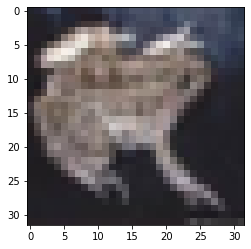

In [ ]:
plt.imshow(x_train[0])

In [ ]:
np.save("/content/vgg16_cifar10_PA2_dataset/x_train.npy",x_train)
np.save("/content/vgg16_cifar10_PA2_dataset/y_train.npy",y_train)
np.save("/content/vgg16_cifar10_PA2_dataset/x_test.npy",x_test)
np.save("/content/vgg16_cifar10_PA2_dataset/y_test.npy",y_test)
np.save("/content/vgg16_cifar10_PA2_dataset/x_valid.npy",x_valid)
np.save("/content/vgg16_cifar10_PA2_dataset/y_valid.npy",y_valid)

# x_train = np.load("/content/vgg16_cifar10_PA2_dataset/x_train.npy")
# y_train = np.load("/content/vgg16_cifar10_PA2_dataset/y_train.npy")
# x_test = np.load("/content/vgg16_cifar10_PA2_dataset/x_test.npy")
# y_test = np.load("/content/vgg16_cifar10_PA2_dataset/y_test.npy")
# x_valid = np.load("/content/vgg16_cifar10_PA2_dataset/x_valid.npy")
# y_valid = np.load("/content/vgg16_cifar10_PA2_dataset/y_valid.npy")

In [ ]:
!zip -r /content/vgg16_cifar10_PA2_dataset.zip /content/vgg16_cifar10_PA2_dataset

updating: content/vgg16_cifar10_PA2_dataset/ (stored 0%)
updating: content/vgg16_cifar10_PA2_dataset/x_train.npy (deflated 82%)
updating: content/vgg16_cifar10_PA2_dataset/x_valid.npy (deflated 82%)
updating: content/vgg16_cifar10_PA2_dataset/y_test.npy (deflated 97%)
updating: content/vgg16_cifar10_PA2_dataset/x_test.npy (deflated 82%)
updating: content/vgg16_cifar10_PA2_dataset/y_valid.npy (deflated 97%)
updating: content/vgg16_cifar10_PA2_dataset/y_train.npy (deflated 97%)


In [ ]:
brute_model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy']) 
history = brute_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=30, batch_size=32)

Epoch 1/30
1250/1250 [==============================] - 98s 70ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3024 - val_accuracy: 0.1461
Epoch 2/30
1250/1250 [==============================] - 91s 73ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3010 - val_accuracy: 0.1423
Epoch 3/30
1250/1250 [==============================] - 90s 72ms/step - loss: 2.2902 - accuracy: 0.1604 - val_loss: 2.2365 - val_accuracy: 0.1601
Epoch 4/30
1250/1250 [==============================] - 87s 70ms/step - loss: 2.1239 - accuracy: 0.1952 - val_loss: 2.1053 - val_accuracy: 0.2031
Epoch 5/30
1250/1250 [==============================] - 86s 69ms/step - loss: 1.9831 - accuracy: 0.2362 - val_loss: 1.8686 - val_accuracy: 0.2769
Epoch 6/30
1250/1250 [==============================] - 86s 69ms/step - loss: 1.8535 - accuracy: 0.2876 - val_loss: 1.8176 - val_accuracy: 0.2929
Epoch 7/30
1250/1250 [==============================] - 91s 73ms/step - loss: 1.7462 - accuracy: 0.3326 - val_loss: 1.6829 -

In [ ]:
brute_model.save("vgg16_cifar10_PA2")

INFO:tensorflow:Assets written to: vgg16_cifar10_PA2/assets


In [ ]:
#!zip -r /content/vgg16_cifar10_PA2.zip /content/vgg16_cifar10_PA2
## downloading older from colab
# from google.colab import files
# files.download("/content/vgg16_cifar10_PA2.zip")

  adding: content/vgg16_cifar10_PA2/ (stored 0%)
  adding: content/vgg16_cifar10_PA2/variables/ (stored 0%)
  adding: content/vgg16_cifar10_PA2/variables/variables.index (deflated 64%)
  adding: content/vgg16_cifar10_PA2/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/vgg16_cifar10_PA2/keras_metadata.pb (deflated 96%)
  adding: content/vgg16_cifar10_PA2/saved_model.pb (deflated 91%)
  adding: content/vgg16_cifar10_PA2/assets/ (stored 0%)


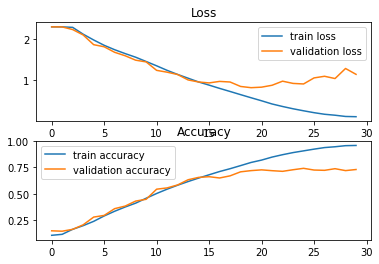

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("training accuracy:",accuracy_score(np.argmax(y_train,axis=1),np.argmax(brute_model.predict(x_train),axis=1))*100,"%")



training accuracy: 95.66 %


In [4]:
def classwise_accuracy(models,x_test,y_test):


  labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(models.predict(x_test),axis=1))*100,"%")

  confus_matrix = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(models.predict(x_test),axis=1))
  print("confusion_matrix:\n",confus_matrix)
  class_accuracy = []
  class_TP = []

  for i in range(confus_matrix.shape[0]):
    for j in range(confus_matrix.shape[1]):
      if i == j:
        TP = confus_matrix[i][j]
        class_TP.append(TP)
        
  for k in range(confus_matrix.shape[1]):
    ca = (class_TP[k] / confus_matrix[:,k].sum())*100
    class_accuracy.append(ca)
    print("class ",k," accuracy ",labels[k]," :",ca,"%")    
    
  class_accuracy = np.array(class_accuracy)
            




In [ ]:
classwise_accuracy(brute_model,x_test,y_test)

#(b) Performing 3 attacks

In [ ]:
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.1 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.4 MB/s 
     |████████████████████████████████| 26.3 MB 58.1 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, SaliencyMapMethod,ProjectedGradientDescent

#**Untargated Attacks**

# FGSM Attack

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [ ]:
attack_fgsm = FastGradientMethod(estimator=classifier,eps = 0.02,batch_size = 32)
x_test_adv_fgsm = attack_fgsm.generate(x_test)
print(x_test_adv_fgsm.shape)

(10000, 32, 32, 3)


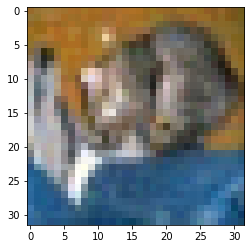

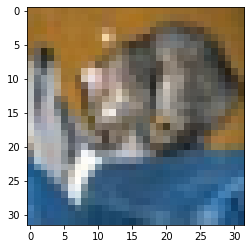

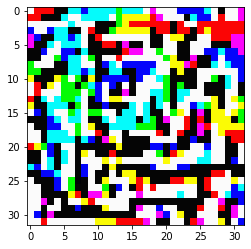

In [ ]:
plt.imshow((x_test_adv_fgsm[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_fgsm[0] - x_test[0])*255).astype(np.uint8))
plt.show()

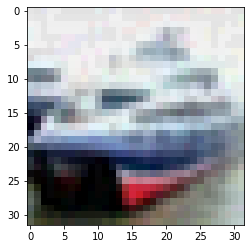

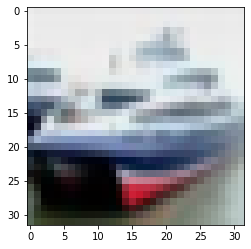

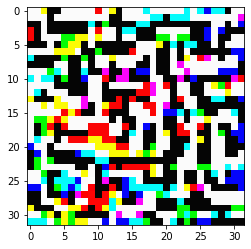

In [ ]:
plt.imshow((x_test_adv_fgsm[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_fgsm[1] - x_test[1])*255).astype(np.uint8))
plt.show()

**checking wrongly predicting**

In [ ]:
print("incorrect label after atack:",np.argmax(brute_model.predict(np.expand_dims(x_test_adv_fgsm[0],axis=0))))

print("corect label:", np.argmax(brute_model.predict(np.expand_dims(x_test[0],axis=0))))

incorrect label after atack: 5
corect label: 3


**accuracy after FGSM attack**

In [ ]:
print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_fgsm),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_fgsm),axis=1)))


test accuracy: 21.08 %
confusion_matrix:
 [[250   4 206  36 144   6   5  34 222  93]
 [ 89 213  17  30  12  11  16  10 174 428]
 [ 93   2 211 156 234  77  88  49  65  25]
 [ 28   8 126 178 168 157  93  95  70  77]
 [ 35   6 189 166 157  68 106 216  36  21]
 [ 14   3 146 302 101 197  48 124  29  36]
 [  8  52 128 341 165  24 146  38  45  53]
 [ 22   2  96  94 363 101  30 232  11  49]
 [340  26  40  59  42  14  11  23 260 185]
 [190  95  30  85  45  12  25 119 135 264]]


In [ ]:
np.save("x_test_adv_fgsm.npy",x_test_adv_fgsm)

In [ ]:
from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_fgsm):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_fgsm[i], data_range=x_test_adv_fgsm[2].max() - x_test_adv_fgsm[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))



In [ ]:
mean_ssim(x_test,x_test_adv_fgsm)

Avaerage SSIM: 0.9645990422324064


# PGD Attack

In [ ]:
brute_model = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_PA2")

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [ ]:
attack_pgd = ProjectedGradientDescent(estimator=classifier,eps=0.02,batch_size=32)
x_test_adv_pgd = attack_pgd.generate(x_test)
print(x_test_adv_pgd.shape)

PGD - Batches: 0it [00:00, ?it/s]

(10000, 32, 32, 3)


In [ ]:
# np.save("x_test_adv_pgd.npy",x_test_adv_pgd)

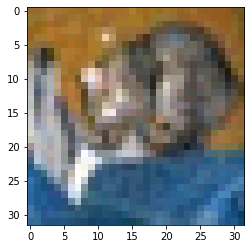

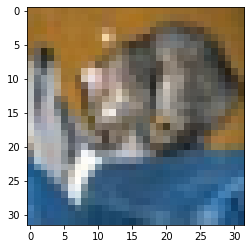

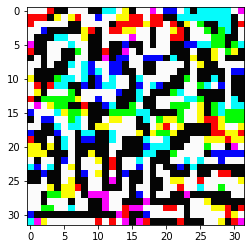

In [ ]:
plt.imshow((x_test_adv_pgd[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_pgd[0] - x_test[0])*255).astype(np.uint8))
plt.show()

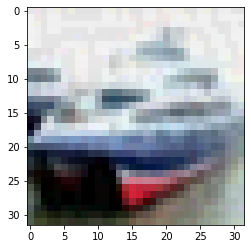

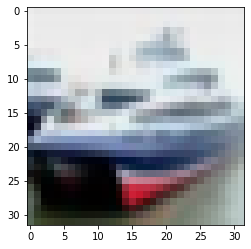

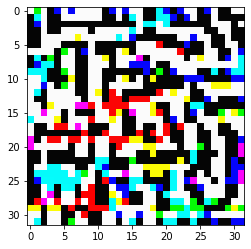

In [ ]:
plt.imshow((x_test_adv_pgd[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_pgd[1] - x_test[1])*255).astype(np.uint8))
plt.show()


**checking wrongly predicting**


In [ ]:
print("incorrect label after atack:",np.argmax(brute_model.predict(np.expand_dims(x_test_adv_pgd[0],axis=0))))

print("corect label:", np.argmax(brute_model.predict(np.expand_dims(x_test[0],axis=0))))

incorrect label after atack: 5
corect label: 3


**accuracy after PGD attack**

In [ ]:
y_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test.npy")

In [ ]:
from sklearn.metrics import accuracy_score
print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_pgd),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_pgd),axis=1)))


test accuracy: 21.33 %
confusion_matrix:
 [[218   3 181  33 207  10  11  35 229  73]
 [ 83 202  20  23  32   8  15  10 169 438]
 [ 53   9 201 152 277  64 103  60  56  25]
 [ 18  12  99 187 243 118  99 100  47  77]
 [ 20   8 150 165 199  63 147 204  29  15]
 [  7   7 136 303 137 160  55 137  32  26]
 [  7  34 114 312 214  23 165  48  30  53]
 [ 14   4  99 110 353  73  52 233   6  56]
 [289  21  68  46  92   4  14  22 282 162]
 [135  99  22  69  75   5  35 139 135 286]]


In [ ]:
from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_pgd):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_pgd[i], data_range=x_test_adv_pgd[2].max() - x_test_adv_pgd[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))



In [ ]:
mean_ssim(x_test,x_test_adv_pgd)

Avaerage SSIM: 0.9641840478985738


#BIM Attack

In [5]:
## mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")
y_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_train.npy")
x_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test.npy")
y_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test.npy")
x_valid = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_valid.npy")
y_valid = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_valid.npy")

brute_model = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_PA2")

In [ ]:
!pip install adversarial-robustness-toolbox
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, SaliencyMapMethod,ProjectedGradientDescent

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 38.1 MB/s 
     |████████████████████████████████| 26.3 MB 58.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [ ]:
attack_bim = BasicIterativeMethod(estimator=classifier,eps=0.02,batch_size=32)
x_test_adv_bim = attack_bim.generate(x_test)
print(x_test_adv_bim.shape)

PGD - Batches: 0it [00:00, ?it/s]

(10000, 32, 32, 3)


In [ ]:
np.save("x_test_adv_bim.npy",x_test_adv_bim)

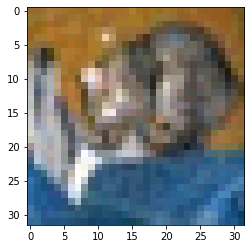

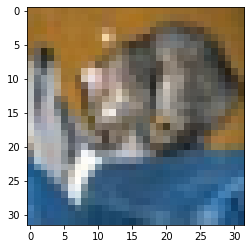

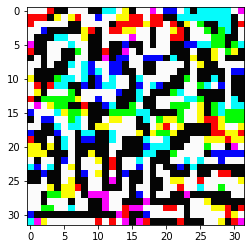

In [ ]:
plt.imshow((x_test_adv_bim[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_bim[0] - x_test[0])*255).astype(np.uint8))
plt.show()

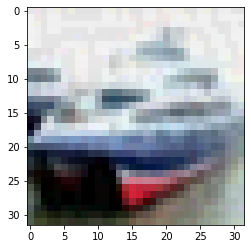

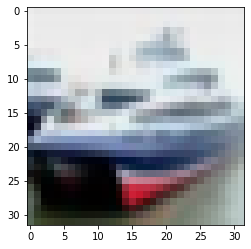

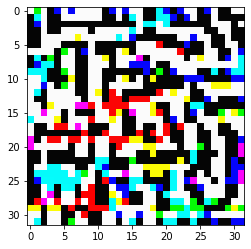

In [ ]:
plt.imshow((x_test_adv_bim[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_bim[1] - x_test[1])*255).astype(np.uint8))
plt.show()


Checking wrongly predicting


In [ ]:
print("incorrect label after atack:",np.argmax(brute_model.predict(np.expand_dims(x_test_adv_bim[0],axis=0))))

print("corect label:", np.argmax(brute_model.predict(np.expand_dims(x_test[0],axis=0))))

incorrect label after atack: 5
corect label: 3


**Accuracy after BIM attack**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_bim),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_bim),axis=1)))


test accuracy: 21.33 %
confusion_matrix:
 [[218   3 181  33 207  10  11  35 229  73]
 [ 83 202  20  23  32   8  15  10 169 438]
 [ 53   9 201 152 277  64 103  60  56  25]
 [ 18  12  99 187 243 118  99 100  47  77]
 [ 20   8 150 165 199  63 147 204  29  15]
 [  7   7 136 303 137 160  55 137  32  26]
 [  7  34 114 312 214  23 165  48  30  53]
 [ 14   4  99 110 353  73  52 233   6  56]
 [289  21  68  46  92   4  14  22 282 162]
 [135  99  22  69  75   5  35 139 135 286]]


In [ ]:
from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_bim):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_bim[i], data_range=x_test_adv_bim[2].max() - x_test_adv_bim[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))


In [ ]:
mean_ssim(x_test,x_test_adv_bim)

Avaerage SSIM: 0.9641837832557465


# Perturbation magnitude histogram

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
def Magnitude_of_perturbation(x_test_adversarial,x_test_original):

  histo_array = []
  histo_dict = dict()

  for i in range(len(x_test_original)):
    
    mean_perturbation = np.mean(np.abs(x_test_adversarial[i] - x_test_original[i]))
    histo_array.append(mean_perturbation)
    if np.round(mean_perturbation,3) not in histo_dict:
      histo_dict[np.round(mean_perturbation,3)] = 1

    elif np.round(mean_perturbation,3) in histo_dict:
      histo_dict[np.round(mean_perturbation,3)] += 1

  print(histo_dict)
  plt.hist(histo_array)
  plt.show()

**FGSM**

In [ ]:
x_test_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_fgsm.npy") 
x_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test.npy")

{0.02: 8962, 0.019: 604, 0.017: 114, 0.016: 68, 0.014: 21, 0.018: 187, 0.015: 37, 0.013: 5, 0.012: 1, 0.011: 1}


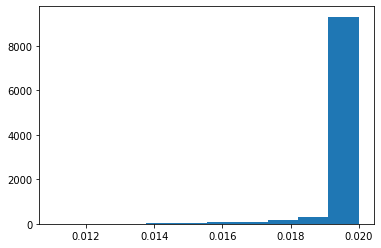

In [ ]:
Magnitude_of_perturbation(x_test_adv_fgsm,x_test)

**PGD**

In [ ]:
x_test_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_pgd.npy") 

{0.02: 8951, 0.019: 613, 0.017: 114, 0.016: 59, 0.014: 19, 0.015: 45, 0.018: 190, 0.013: 6, 0.012: 2, 0.011: 1}


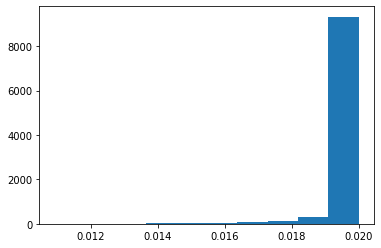

In [ ]:
Magnitude_of_perturbation(x_test_adv_pgd,x_test)

**BIM**

In [ ]:
x_test_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_bim.npy") 

{0.02: 8958, 0.019: 608, 0.017: 113, 0.016: 62, 0.014: 21, 0.018: 187, 0.013: 6, 0.015: 42, 0.012: 2, 0.011: 1}


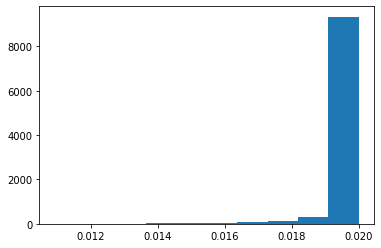

In [ ]:
Magnitude_of_perturbation(x_test_adv_bim,x_test)

# Targated attack

In [ ]:
!pip install adversarial-robustness-toolbox
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, SaliencyMapMethod,ProjectedGradientDescent

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 25.0 MB/s 
     |████████████████████████████████| 26.3 MB 55.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
x_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test.npy")
y_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test.npy")

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Targeted FGSM

(10000, 32, 32, 3)


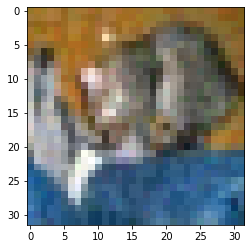

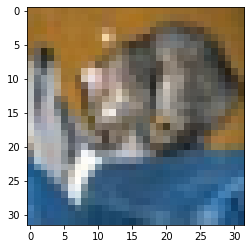

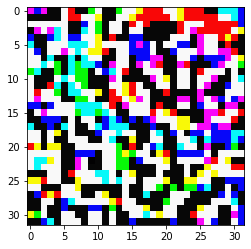

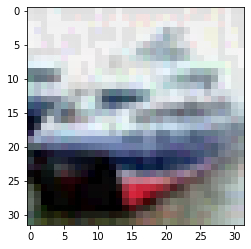

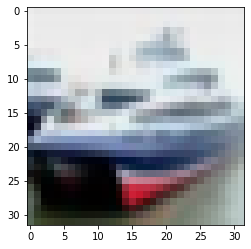

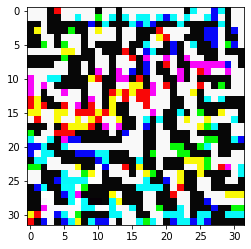


 accuracy after attack target
test accuracy: 21.34 %
confusion_matrix:
 [[164   2 193  81 127   7 166   2 249   9]
 [101 185  54  64  50  17 228   7 169 125]
 [ 13  10 104 117 143   4 520   6  62  21]
 [  7  21  48 118 161  19 575   5  30  16]
 [  3   8  61 127  94  19 649   0  35   4]
 [ 10  25  74 204 119  36 446  24  33  29]
 [  0   3   3   2  15   0 976   0   1   0]
 [ 10  16  96 147 255  74 282  64  25  31]
 [216  17  98  39 188  10 108  25 235  64]
 [ 61  52  69  94 131  22 236  30 147 158]]
Avaerage SSIM: 0.9305952454053047


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)


target=np.array([[0,0,0,0,0,0,1,0,0,0]]*len(x_test))

attack_fgsm_target = FastGradientMethod(estimator=classifier,eps = 0.03,batch_size = 32, targeted=True)
x_test_adv_fgsm_target = attack_fgsm_target.generate(x_test,target)
print(x_test_adv_fgsm_target.shape)



## 0th image ##
plt.imshow((x_test_adv_fgsm_target[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_fgsm_target[0] - x_test[0])*255).astype(np.uint8))
plt.show()


## 1st image ##
plt.imshow((x_test_adv_fgsm_target[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_fgsm_target[1] - x_test[1])*255).astype(np.uint8))
plt.show()



print("\n accuracy after attack target")

print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_fgsm_target),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_fgsm_target),axis=1)))

np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_fgsm_target.npy",x_test_adv_fgsm_target)


from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_fgsm_target):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_fgsm_target[i], data_range=x_test_adv_fgsm_target[2].max() - x_test_adv_fgsm_target[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))


mean_ssim(x_test,x_test_adv_fgsm_target)


Magnitude of Perturbation

In [ ]:
x_test_adv_fgsm_target = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_fgsm_target.npy") 

{0.03: 8279, 0.029: 975, 0.025: 66, 0.028: 281, 0.024: 50, 0.021: 11, 0.027: 156, 0.023: 39, 0.026: 97, 0.022: 26, 0.02: 15, 0.018: 2, 0.016: 1, 0.019: 2}


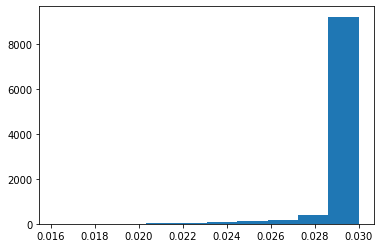

In [ ]:
Magnitude_of_perturbation(x_test_adv_fgsm_target,x_test)

# Targeted PGD

PGD - Batches: 0it [00:00, ?it/s]

(10000, 32, 32, 3)


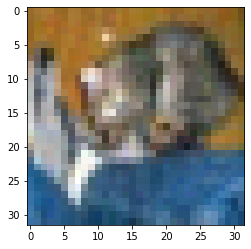

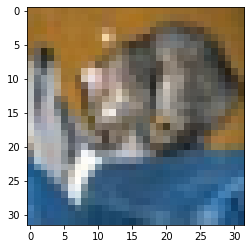

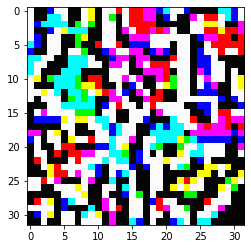

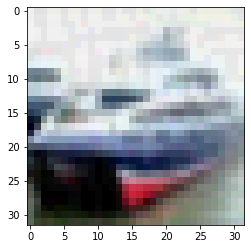

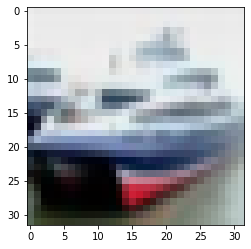

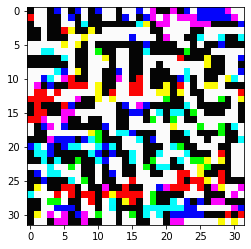


 accuracy after attack target
test accuracy: 55.230000000000004 %
confusion_matrix:
 [[478  10  94  31 137   2  63   7 158  20]
 [ 17 700  11  23  17   3  64   2  70  93]
 [ 22   2 386  80 130  22 314   4  27  13]
 [  5   6  43 412 136  46 317   3  24   8]
 [  4   8  29  68 578   9 288   5  10   1]
 [  6   3  55 253 153 288 221   9   5   7]
 [  0   2  22  46  35   4 887   0   4   0]
 [  3   1  35 144 311  66 106 306   5  23]
 [ 48   4  28  30  26   0  45   4 796  19]
 [ 30  55   7  53  29   3  72   8  51 692]]
Avaerage SSIM: 0.964305919638025


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)


target=np.array([[0,0,0,0,0,0,1,0,0,0]]*len(x_test))

attack_pgd_target = ProjectedGradientDescent(estimator=classifier,eps=0.02,batch_size=32,targeted=True)

x_test_adv_pgd_target = attack_pgd_target.generate(x_test,target)
print(x_test_adv_pgd_target.shape)



## 0th image ##
plt.imshow((x_test_adv_pgd_target[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_pgd_target[0] - x_test[0])*255).astype(np.uint8))
plt.show()




## 1st image ##
plt.imshow((x_test_adv_pgd_target[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_pgd_target[1] - x_test[1])*255).astype(np.uint8))
plt.show()




print("\n accuracy after attack target")

print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_pgd_target),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_pgd_target),axis=1)))


np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_pgd_target.npy",x_test_adv_pgd_target)


from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_pgd_target):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_pgd_target[i], data_range=x_test_adv_pgd_target[2].max() - x_test_adv_pgd_target[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))


mean_ssim(x_test,x_test_adv_pgd_target)


Magnitude of Perturbation

{0.02: 8975, 0.017: 110, 0.019: 589, 0.014: 21, 0.016: 62, 0.015: 44, 0.018: 190, 0.013: 5, 0.012: 3, 0.011: 1}


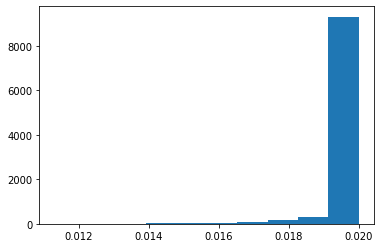

In [ ]:
x_test_adv_pgd_target = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_pgd_target.npy") 
Magnitude_of_perturbation(x_test_adv_pgd_target,x_test)

#Targeted BIM

PGD - Batches: 0it [00:00, ?it/s]

(10000, 32, 32, 3)


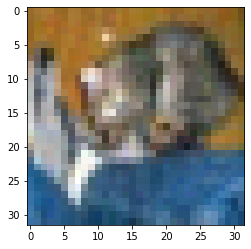

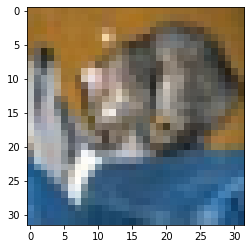

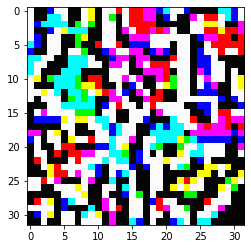

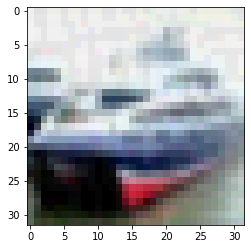

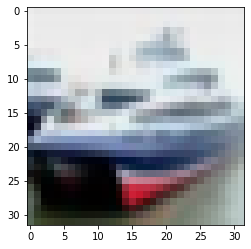

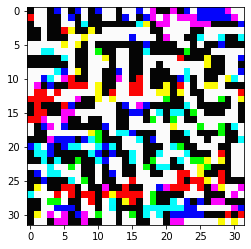


 accuracy after attack target
test accuracy: 55.230000000000004 %
confusion_matrix:
 [[478  10  94  31 137   2  63   7 158  20]
 [ 17 700  11  23  17   3  64   2  70  93]
 [ 22   2 386  80 130  22 314   4  27  13]
 [  5   6  43 412 136  46 317   3  24   8]
 [  4   8  29  69 578   9 287   5  10   1]
 [  6   3  55 253 153 288 221   9   5   7]
 [  0   2  22  46  35   4 887   0   4   0]
 [  3   1  35 144 311  66 106 306   5  23]
 [ 48   4  28  30  26   0  45   4 796  19]
 [ 30  55   7  53  29   3  72   8  51 692]]
Avaerage SSIM: 0.9643059241507279


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)


target=np.array([[0,0,0,0,0,0,1,0,0,0]]*len(x_test))
attack_bim_target = BasicIterativeMethod(estimator=classifier,eps=0.02,batch_size=32,targeted=True)

x_test_adv_bim_target = attack_bim_target.generate(x_test,target)
print(x_test_adv_bim_target.shape)



## 0th image ##
plt.imshow((x_test_adv_bim_target[0]*255).astype(np.uint8)) 
plt.show()

plt.imshow((x_test[0]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_bim_target[0] - x_test[0])*255).astype(np.uint8))
plt.show()


## 1st image ##
plt.imshow((x_test_adv_bim_target[1]*255).astype(np.uint8))
plt.show()

plt.imshow((x_test[1]*255).astype(np.uint8))
plt.show()

plt.imshow(((x_test_adv_bim_target[1] - x_test[1])*255).astype(np.uint8))
plt.show()




print("\n accuracy after attack target")

print("test accuracy:",accuracy_score(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_bim_target),axis=1))*100,"%")

print("confusion_matrix:\n",confusion_matrix(np.argmax(y_test,axis=1),np.argmax(brute_model.predict(x_test_adv_bim_target),axis=1)))


np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_bim_target.npy",x_test_adv_bim_target)


from skimage.metrics import structural_similarity as ssim

def mean_ssim(x_test,x_test_adv_bim_target):
  
  all_ssims = 0
  for i in range(len(x_test)):
    all_ssims += ssim(x_test[i],x_test_adv_bim_target[i], data_range=x_test_adv_bim_target[2].max() - x_test_adv_bim_target[2].min(), multichannel=True)

  print("Avaerage SSIM:",all_ssims/len(x_test))


mean_ssim(x_test,x_test_adv_bim_target)


Magnitude of Perturbation

{0.02: 8975, 0.017: 111, 0.019: 589, 0.014: 21, 0.016: 62, 0.015: 44, 0.018: 189, 0.013: 5, 0.012: 3, 0.011: 1}


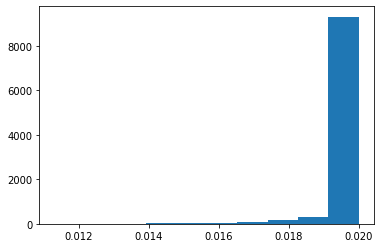

In [ ]:
x_test_adv_bim_target = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_bim_target.npy") 
Magnitude_of_perturbation(x_test_adv_bim_target,x_test)

# JPEG COMPRESSION  - in other colab file 
jpeg compression file: P21CS007_compression.ipynb

# FGSM Attack on x_train

In [16]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [17]:
x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")

In [19]:
attack_fgsm = FastGradientMethod(estimator=classifier,eps=0.02,batch_size=32)
x_train_adv_fgsm = attack_fgsm.generate(x_train)
print(x_train_adv_fgsm.shape)
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_fgsm.npy",x_train_adv_pgd)

(40000, 32, 32, 3)


# BIM Attack on x_train

In [21]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [22]:
x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")

In [23]:
attack_fgsm = FastGradientMethod(estimator=classifier,eps=0.02,batch_size=32)
x_train_adv_fgsm = attack_fgsm.generate(x_train)
print(x_train_adv_fgsm.shape)
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_fgsm.npy",x_train_adv_pgd)


(40000, 32, 32, 3)


# PGD Attack on x_train


In [ ]:
brute_model = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_PA2")

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(model=brute_model, nb_classes=10, input_shape=(32, 32, 3), loss_object=loss_object,clip_values=(0, 1), channels_first=False)

In [ ]:
x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")

In [ ]:
attack_pgd = ProjectedGradientDescent(estimator=classifier,eps=0.02,batch_size=32)
x_train_adv_pgd = attack_pgd.generate(x_train)
print(x_train_adv_pgd.shape)
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_pgd.npy",x_train_adv_pgd)

(40000, 32, 32, 3)


# Adversarial Training

In [ ]:
original_x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")
original_y_train= np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_train.npy")

In [ ]:
## attacks x_train

x_train_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_fgsm.npy")
x_train_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_pgd.npy")
x_train_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_bim.npy")
 
new_x_train_for_adversarial_training = np.vstack((original_x_train,x_train_adv_fgsm,x_train_adv_pgd,x_train_adv_bim))

In [ ]:
new_y_train_for_adversarial_training = np.vstack((original_y_train,original_y_train,original_y_train,original_y_train))

In [ ]:
print(new_x_train_for_adversarial_training.shape)
print(new_y_train_for_adversarial_training.shape)

(160000, 32, 32, 3)
(160000, 10)


In [36]:
vgg16_keras_model_adv = VGG16(include_top=False,weights=None,pooling='max')

brute_model_adv= Sequential()

brute_model_adv.add(vgg16_keras_model_adv)
brute_model_adv.add(Flatten())
brute_model_adv.add(Dense(4096, activation=('relu'))) 
brute_model_adv.add(Dense(4096, activation=('relu')))
brute_model_adv.add(Dense(10, activation=('softmax')))

brute_model_adv.summary()

In [ ]:
from sklearn.model_selection import train_test_split


new_x_train_adv, new_x_valid_adv, new_y_train_adv, new_y_valid_adv = train_test_split(new_x_train_for_adversarial_training, new_y_train_for_adversarial_training, test_size=0.2, random_state=42,shuffle=True)

print(new_x_train_adv.shape)
print(new_y_train_adv.shape)
print(new_x_valid_adv.shape)
print(new_y_valid_adv.shape)


(128000, 32, 32, 3)
(128000, 10)
(32000, 32, 32, 3)
(32000, 10)


In [14]:
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_x_train_adv.npy",new_x_train_adv)
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_y_train_adv.npy",new_y_train_adv)
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_x_valid_adv.npy",new_x_valid_adv)
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_y_valid_adv.npy",new_y_valid_adv)

new_x_train_adv = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_x_train_adv.npy")
new_y_train_adv = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_y_train_adv.npy")
new_x_valid_adv = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_x_valid_adv.npy")
new_y_valid_adv = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_y_valid_adv.npy")

In [7]:
brute_model_adv.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy']) 
history_adv = brute_model_adv.fit(new_x_train_adv, new_y_train_adv, validation_data=(new_x_valid_adv, new_y_valid_adv), epochs=15, batch_size=32)

Epoch 1/15
4000/4000 [==============================] - 284s 68ms/step - loss: 2.2986 - accuracy: 0.1211 - val_loss: 2.2411 - val_accuracy: 0.1746
Epoch 2/15
4000/4000 [==============================] - 273s 68ms/step - loss: 2.0093 - accuracy: 0.2478 - val_loss: 1.8202 - val_accuracy: 0.3198
Epoch 3/15
4000/4000 [==============================] - 273s 68ms/step - loss: 1.7050 - accuracy: 0.3611 - val_loss: 1.5209 - val_accuracy: 0.4308
Epoch 4/15
4000/4000 [==============================] - 269s 67ms/step - loss: 1.3985 - accuracy: 0.4821 - val_loss: 1.3676 - val_accuracy: 0.4938
Epoch 5/15
4000/4000 [==============================] - 272s 68ms/step - loss: 1.1621 - accuracy: 0.5747 - val_loss: 1.0405 - val_accuracy: 0.6194
Epoch 6/15
4000/4000 [==============================] - 269s 67ms/step - loss: 0.9331 - accuracy: 0.6643 - val_loss: 0.8722 - val_accuracy: 0.6864
Epoch 7/15
4000/4000 [==============================] - 272s 68ms/step - loss: 0.6782 - accuracy: 0.7603 - val_loss: 0

In [8]:
brute_model_adv.save("/content/drive/MyDrive/vgg16_cifar10_adv_PA2")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/vgg16_cifar10_adv_PA2/assets


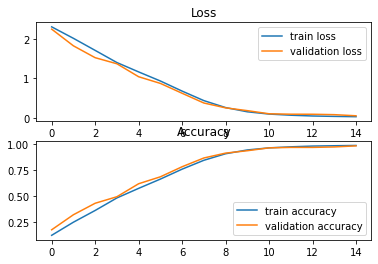

In [10]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history_adv.history['loss'], label='train loss')
plt.plot(history_adv.history['val_loss'], label='validation loss')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_adv.history['accuracy'], label='train accuracy')
plt.plot(history_adv.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [ ]:
brute_model_adv = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_adv_PA2")

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("training accuracy:",accuracy_score(np.argmax(new_y_train_adv,axis=1),np.argmax(brute_model_adv.predict(new_x_train_adv),axis=1))*100,"%")



training accuracy: 99.38671875 %


In [9]:
## attacks x_test

original_x_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test.npy")
x_test_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_fgsm.npy")
x_test_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_pgd.npy")
x_test_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_bim.npy")
 
new_x_test_for_adversarial_training = np.vstack((original_x_test,x_test_adv_fgsm,x_test_adv_pgd,x_test_adv_bim))
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_x_test_for_adversarial_training.npy",new_x_test_for_adversarial_training)



original_y_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test.npy")

new_y_test_for_adversarial_training = np.vstack((original_y_test,original_y_test,original_y_test,original_y_test))
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/new_y_test_for_adversarial_training.npy",new_y_test_for_adversarial_training)

In [12]:
new_x_test_for_adversarial_training.shape,new_y_test_for_adversarial_training.shape

((40000, 32, 32, 3), (40000, 10))

In [15]:
classwise_accuracy(brute_model_adv,new_x_test_for_adnew_y_valid_adversarial_training,new_y_test_for_adversarial_training)

test accuracy: 98.54375 %
confusion_matrix:
 [[3064    0   13    1    0    0    0    3   26    2]
 [   2 3213    0    0    1    0    0    0    2    3]
 [   8    0 3174    4    8    1    0    0    3    0]
 [   5    0   13 3065   15   14   14   11   40    6]
 [   6    0   18    4 3205    3    8   30    0    0]
 [   0    2   19   31   11 3112    1   18    4    2]
 [   0    0    7   12   19    3 3177    1    1    4]
 [   7    0    1   11    4    5    1 3201    0    2]
 [   2    0    0    1    0    0    0    0 3205    0]
 [   7    2    0    2    0    0    0   16    6 3118]]
class  0  accuracy  airplane  : 98.80683650435344 %
class  1  accuracy  automobile  : 99.87566055331054 %
class  2  accuracy  bird  : 97.81201848998458 %
class  3  accuracy  cat  : 97.89204726924305 %
class  4  accuracy  deer  : 98.22249463683727 %
class  5  accuracy  dog  : 99.17144678138942 %
class  6  accuracy  frog  : 99.2502343017807 %
class  7  accuracy  horse  : 97.59146341463415 %
class  8  accuracy  ship  : 97.5

# Visualizing Network Activations

In [17]:
brute_model_adv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4096)              2101248   
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 10)                40970     
                                                                 
Total params: 33,638,218
Trainable params: 33,638,218
Non-trainable params: 0
_________________________________________________________________


In [27]:
for layer in (brute_model_adv.layers[0]).layers:
  print(layer)


In [71]:
layer_for_viualization_output = [((brute_model_adv.layers[0]).layers[1]).output]


network_activation_model = Model(inputs=(brute_model_adv.layers[0]).input,outputs=layer_for_viualization_output)



In [82]:
x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")[0:3]
x_train_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_fgsm.npy")[0:3]
x_train_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_pgd.npy")[0:3]
x_train_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_bim.npy")[0:3]


original_activation


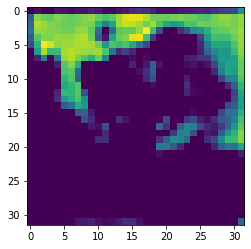

fgsm_activation


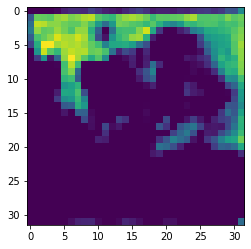

pgd_activation


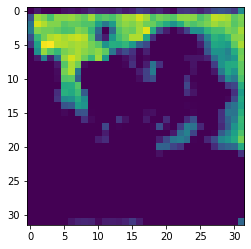

bim_activation


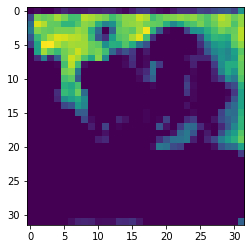

In [102]:
network_activations_original = network_activation_model.predict(original_x_test[0:3])
network_activations_fgsm = network_activation_model.predict(x_test_adv_fgsm[0:3])
network_activations_pgd = network_activation_model.predict(x_test_adv_pgd[0:3])
network_activations_bim = network_activation_model.predict(x_test_adv_bim[0:3])

# network_activations_original[0][:,:,0].shape
print("original_activation")
plt.imshow(network_activations_original[0,:,:,0],cmap='viridis')
plt.show()

print("fgsm_activation")
plt.imshow(network_activations_fgsm[0][:,:,0],cmap='viridis')
plt.show()

print("pgd_activation")
plt.imshow(network_activations_pgd[0][:,:,0],cmap='viridis')
plt.show()

print("bim_activation")
plt.imshow(network_activations_bim[0][:,:,0],cmap='viridis')
plt.show()



original_activation


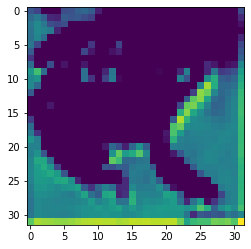

fgsm_activation


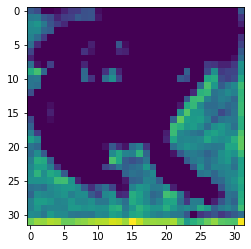

pgd_activation


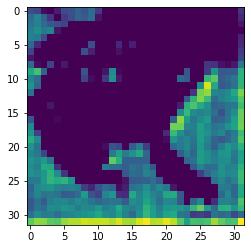

bim_activation


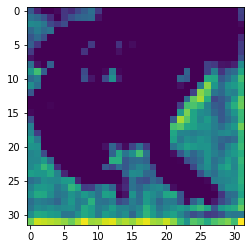

In [101]:
network_activations_original = network_activation_model.predict(x_train)
network_activations_fgsm = network_activation_model.predict(x_train_adv_fgsm)
network_activations_pgd = network_activation_model.predict(x_train_adv_pgd)
network_activations_bim = network_activation_model.predict(x_train_adv_bim)

# network_activations_original[0][:,:,0].shape
print("original_activation")
plt.imshow(network_activations_original[0][:,:,0])
plt.show()

print("fgsm_activation")
plt.imshow(network_activations_fgsm[0][:,:,0])
plt.show()

print("pgd_activation")
plt.imshow(network_activations_pgd[0][:,:,0])
plt.show()

print("bim_activation")
plt.imshow(network_activations_bim[0][:,:,0])
plt.show()



#Detection - SVM

In [ ]:
original_x_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train.npy")
x_train_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_fgsm.npy")
x_train_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_pgd.npy")
x_train_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_adv_bim.npy")
original_y_train = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_train.npy")


In [ ]:
x_train_detction = np.vstack((original_x_train,x_train_adv_fgsm,x_train_adv_pgd,x_train_adv_bim))
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_detction.npy",x_train_detction)


In [4]:
x_train_detction = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_detction.npy")

## passsing to adversarialy trained network
brute_model_adv = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_adv_PA2")

layer_for_detection_output = [brute_model_adv.layers[-4].output]
network_detection_model = Model(inputs=brute_model_adv.input,outputs=layer_for_detection_output)


In [7]:
x_train_detction_brute_model_adv_flatten = network_detection_model.predict(x_train_detction)
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_detction_brute_model_adv_flatten.npy",x_train_detction_brute_model_adv_flatten)

In [ ]:
y_train_non_perturbed_ones = np.ones(len(original_y_train)).reshape(len(original_y_train),1)
y_train_perturbed_zeros = np.zeros(len(original_y_train)).reshape(len(original_y_train),1)
y_train_detction = np.vstack((y_train_non_perturbed_ones,y_train_perturbed_zeros,y_train_perturbed_zeros,y_train_perturbed_zeros))

In [1]:
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_train_detction.npy",y_train_detction)

In [ ]:
## donot use this beacuse high computation power and ram & also get more bttere fetures extracted from trained VGG16 initially one
# x_train_detction_flatten = x_train_detction.reshape(len(x_train_detction),-1)
# np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_detction_flatten.npy",x_train_detction_flatten)

In [1]:
import numpy as np
x_train_detction_brute_model_adv_flatten = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_train_detction_brute_model_adv_flatten.npy")
y_train_detction = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_train_detction.npy")

In [2]:
print(x_train_detction_brute_model_adv_flatten.shape)
print(y_train_detction.ravel().shape)

(160000, 512)
(160000,)


In [3]:
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
import joblib
svm_detection_classifier = CalibratedClassifierCV(svm.LinearSVC())
svm_detection_classifier.fit(x_train_detction_brute_model_adv_flatten, y_train_detction.ravel())

joblib.dump(svm_detection_classifier, '/content/drive/MyDrive/svm_detection_model.sav')

svm_detection_classifier = joblib.load('/content/drive/MyDrive/svm_detection_model.sav')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [5]:
original_x_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test.npy")
x_test_adv_fgsm = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_fgsm.npy")
x_test_adv_pgd = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_pgd.npy")
x_test_adv_bim = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_adv_bim.npy")
original_y_test = np.load("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test.npy")

In [9]:
brute_model_adv = tf.keras.models.load_model("/content/drive/MyDrive/vgg16_cifar10_adv_PA2")

layer_for_detection_output = [brute_model_adv.layers[-4].output]
network_detection_model = Model(inputs=brute_model_adv.input,outputs=layer_for_detection_output)

In [10]:
x_test_detction = np.vstack((original_x_test,x_test_adv_fgsm,x_test_adv_pgd,x_test_adv_bim))
x_test_detction_brute_model_adv_flatten = network_detection_model.predict(x_test_detction)
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/x_test_detction_brute_model_adv_flatten.npy",x_test_detction_brute_model_adv_flatten)


y_test_non_perturbed_ones = np.ones(len(original_y_test)).reshape(len(original_y_test),1)
y_test_perturbed_zeros = np.zeros(len(original_y_test)).reshape(len(original_y_test),1)
y_test_detction = np.vstack((y_test_non_perturbed_ones,y_test_perturbed_zeros,y_test_perturbed_zeros,y_test_perturbed_zeros))
np.save("/content/drive/MyDrive/vgg16_cifar10_PA2_dataset/y_test_detction.npy",y_test_detction)

In [11]:
y_pred_x_test_detction = svm_detection_classifier.predict(x_test_detction_brute_model_adv_flatten)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test_detction,y_pred_x_test_detction)

0.75